# Fitting a small neural network for T = f(z)
Using a compact feedforward network in PyTorch to interpolate the provided (z, T) points.


In [1]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.manual_seed(0)
%matplotlib inline


In [2]:
# data table converted to numpy and torch
data = np.array([
    0, 22.8,
    2.3, 22.8,
    4.9, 22.8,
    9.1, 20.6,
    13.7, 13.9,
    18.3, 11.7,
    22.9, 11.1,
    27.2, 11.1,
]).astype(np.float32)

z = torch.tensor(data[0::2]).unsqueeze(1)
T = torch.tensor(data[1::2]).unsqueeze(1)

print('z values:', z.squeeze().numpy())
print('T values:', T.squeeze().numpy())


z values: [ 0.   2.3  4.9  9.1 13.7 18.3 22.9 27.2]
T values: [22.8 22.8 22.8 20.6 13.9 11.7 11.1 11.1]


In [8]:
# small feedforward model: 1 -> 16 -> 8 -> 1
model = nn.Sequential(
    nn.Linear(1, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
model


Sequential(
  (0): Linear(in_features=1, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
)

In [9]:
# training loop
num_epochs = 200
loss_history = []

for epoch in range(num_epochs):
    pred = model(z)
    loss = loss_fn(pred, T)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch + 1}: loss = {loss.item():.4f}')


Epoch 10: loss = 199.3879
Epoch 20: loss = 193.5777
Epoch 30: loss = 182.5121
Epoch 40: loss = 169.7615
Epoch 50: loss = 151.8775
Epoch 60: loss = 128.4146
Epoch 70: loss = 93.3995
Epoch 80: loss = 52.3937
Epoch 90: loss = 17.6684
Epoch 100: loss = 6.7606
Epoch 110: loss = 4.5370
Epoch 120: loss = 2.1807
Epoch 130: loss = 1.2583
Epoch 140: loss = 0.9723
Epoch 150: loss = 0.7275
Epoch 160: loss = 0.5573
Epoch 170: loss = 0.4653
Epoch 180: loss = 0.4103
Epoch 190: loss = 0.3670
Epoch 200: loss = 0.3178


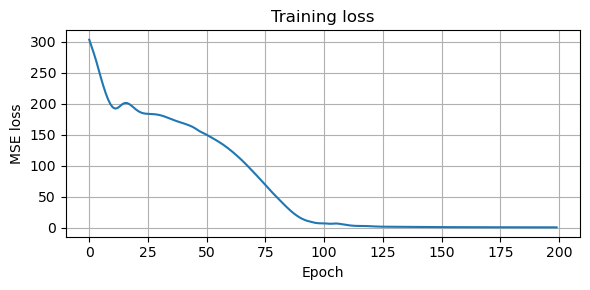

In [10]:
plt.figure(figsize=(6, 3))
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('MSE loss')
plt.title('Training loss')
plt.grid(True)
plt.tight_layout()
plt.show()


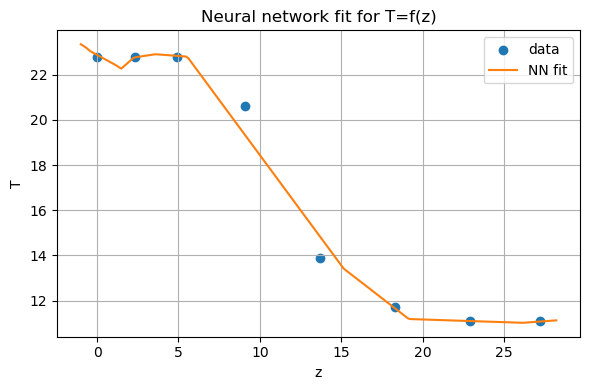

Predictions on training points:
z=  0.0, T=22.80, predicted=22.88
z=  2.3, T=22.80, predicted=22.77
z=  4.9, T=22.80, predicted=22.84
z=  9.1, T=20.60, predicted=19.32
z= 13.7, T=13.90, predicted=14.82
z= 18.3, T=11.70, predicted=11.66
z= 22.9, T=11.10, predicted=11.10
z= 27.2, T=11.10, predicted=11.08


In [12]:
with torch.no_grad():
    z_plot = torch.linspace(z.min() - 1, z.max() + 1, 200).unsqueeze(1)
    T_pred_curve = model(z_plot)
    T_pred_train = model(z)

plt.figure(figsize=(6, 4))
plt.scatter(z.numpy(), T.numpy(), color='tab:blue', label='data')
plt.plot(z_plot.numpy(), T_pred_curve.numpy(), color='tab:orange', label='NN fit')
plt.xlabel('z')
plt.ylabel('T')
plt.title('Neural network fit for T=f(z)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print('Predictions on training points:')
for zi, ti, pi in zip(z, T, T_pred_train):
    print(f'z={zi.item():5.1f}, T={ti.item():5.2f}, predicted={pi.item():5.2f}')


In [13]:
# predict the temperature at z = 15
z_test = torch.tensor([[15.0]])
with torch.no_grad():
    T_test_pred = model(z_test)
print(f'Predicted temperature at z=15: T={T_test_pred.item():.2f}')

Predicted temperature at z=15: T=13.55
